# 1. Data

## 1.1. Read data

In [381]:
# Import the libraries 
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import defaultdict
from queue import PriorityQueue

In [382]:
# Read data from CSV file
df = pd.read_csv("Data_CSV_tuanlda78202.csv", sep =";")

# Convert comman object to float 
def obj_to_float(object):
    if object == "0":
        return int(object)
    else:
        list_obj = list(object)
        i = 0
        while i < len(object):
            if object[i] == ",":
                list_obj[i] = "."
                object = float("".join(list_obj))
                break
            i += 1 
        return object
for row in range(0,63):
    df.loc[row] = df.loc[row].apply(obj_to_float)

In [383]:
df.head()

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0,1160.328125,1116.327582,124.340009,30.55865,597.455091,1160.851404,1132.378709,885.694721,...,1094.960639,1124.167884,253.245571,1338.581425,612.139008,197.376884,1284.528508,1184.499927,10.7638,106.6436
1,Ha Noi,1160.328125,0,126.38586,1235.554616,1144.991818,656.690777,59.499238,88.532125,274.868404,...,75.458333,61.937428,1253.715745,264.688208,632.876926,1012.092866,258.96915,25.156596,21.1382,105.505
2,Hai Phong,1116.327582,126.38586,0,1201.305114,1098.305041,575.045991,74.855725,38.212372,257.613414,...,81.046226,67.797153,1233.502621,388.365117,552.14268,954.6847,385.354979,131.855404,20.8,106.6667
3,Can Tho,124.340009,1235.554616,1201.305114,0,154.836491,706.31833,1240.919573,1214.553251,961.075782,...,1173.594679,1203.685561,141.402052,1397.101956,719.138646,318.316161,1340.06003,1260.217144,10.0333,105.7833
4,Dong Nai,30.55865,1144.991818,1098.305041,154.836491,0,572.923473,1144.164266,1115.131849,870.755857,...,1078.756363,1107.678552,282.901262,1327.577244,588.20148,169.248401,1274.383073,1168.99858,10.9277,106.8681


## 1.2. Visualization

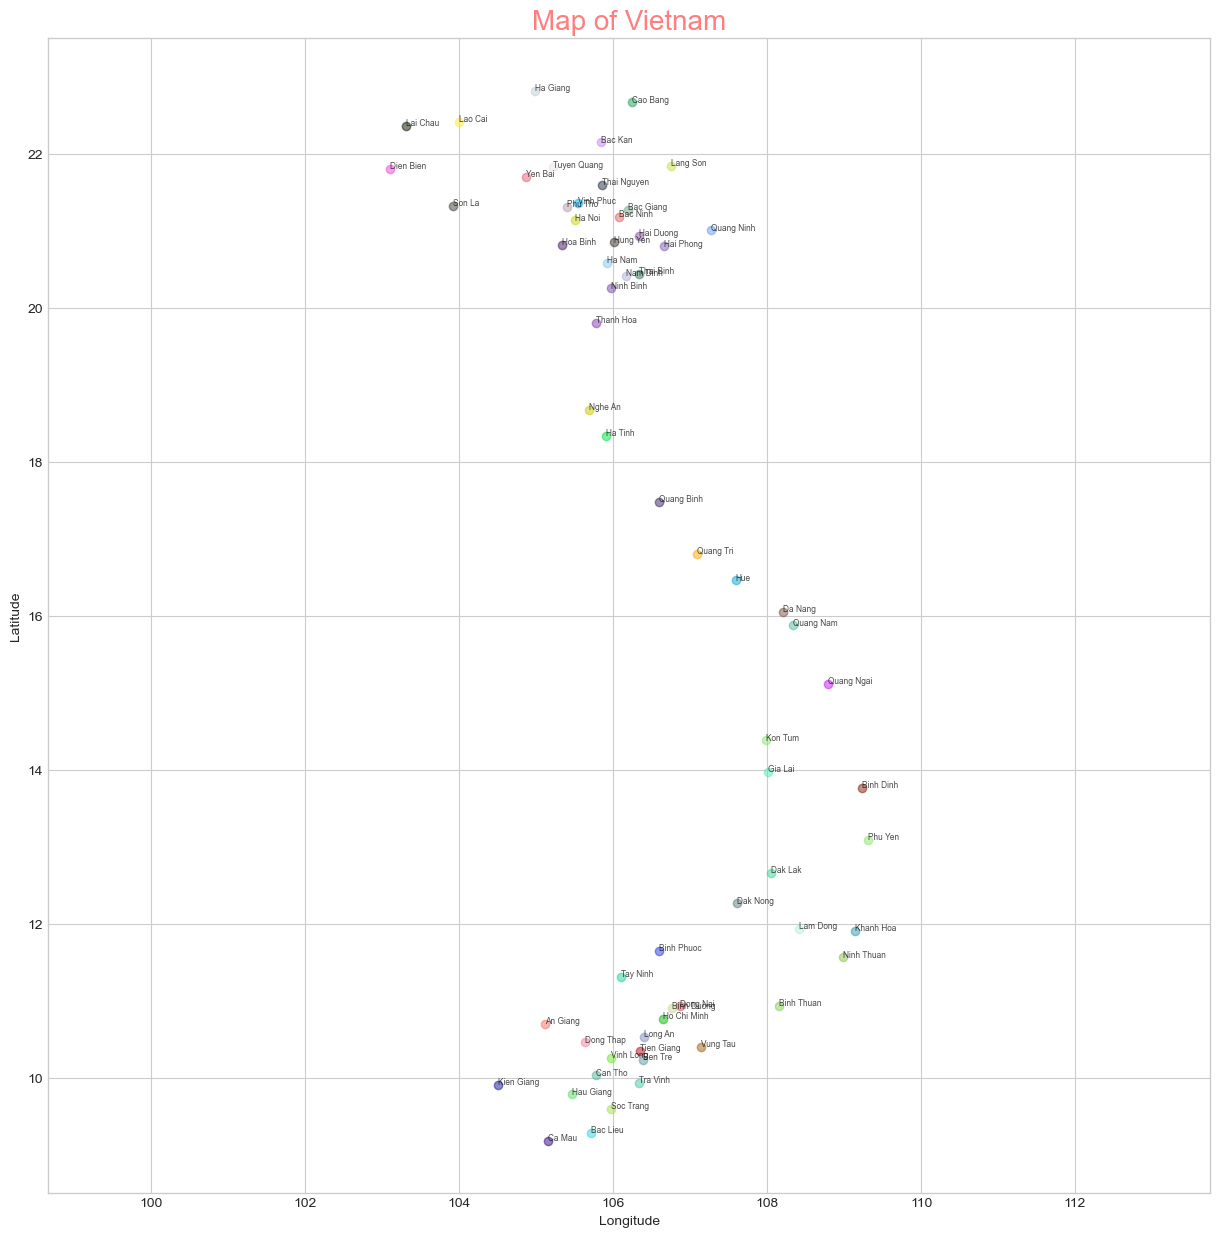

In [384]:
# Visualize
Longitude, Latitude, Province = df["Longitude"],df["Latitude"],df["Province"]

# change style plt
plt.style.available
plt.style.use('seaborn-whitegrid')

# size fig
plt.figure(figsize = (15,15))

# scatter
# plt.scatter(Longitude,Latitude, c = color, alpha = 0.4)

for x, y in zip(Longitude, Latitude):
    rgb = np.random.rand(3,)
    plt.scatter(x, y, c=[rgb], alpha = 0.5)

plt.axis([100,112,8,30])
plt.axis("equal")

# label
plt.title("Map of Vietnam", color = "red",fontsize = 20, alpha = 0.5)
plt.xlabel("Longitude", fontsize = 10)
plt.ylabel("Latitude", fontsize = 10)

for i in range(len(Province)):
    plt.text(Longitude[i],Latitude[i],Province[i],color = "black", fontsize = 6,alpha = 0.7)
# show
plt.show();

## 1.3. I/O

In [385]:
# Create START & END
start = str(input("START: ")).strip().title()
end = str(input("END: ")).strip().title()

# Time Clock 
start_time = time.time()

# Create id for START & END 
for i in range(len(df)):
    if df.iloc[i,0] == start:
        start_id = i
    elif df.iloc[i,0] == end:
        end_id = i

print("{} has ID {}.".format(start,start_id))
print("{} has ID {}.".format(end,end_id))

Hai Phong has ID 10.
Thanh Hoa has ID 10.


## 1.4. Data Processing

In [386]:
# Distance limit for each region of Vietnam
divide_region = pd.read_excel("Distance_Limit_Region.xlsx")
divide_region

,Region,Min Latitude,Max Latitude,Min Longtitude,Max Latitude.1,Distance Limit
0,Dien Bien & Ha Giang & Tuyen Quang,21.3,22.90,103.10,105.30,130.0
1,Cao Bang & Bac Kan & Lang Son,21.6,22.70,105.83,106.76,120.0
2,Central of Vietnam,15.8,19.90,103.00,110.00,130.0
3,Tay Nguyen,10.9,15.13,103.00,110.00,150.0
4,Southern Vietnam,NaN,NaN,NaN,NaN,NaN


In [387]:
df.sort_values(["Latitude","Longitude"], ascending = False).head()

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
51,Ha Giang,1352.918818,194.995391,284.345853,1425.172286,1338.19436,848.62821,214.148122,251.440063,467.447553,...,267.373888,243.788249,1437.447588,178.95988,825.012985,1206.893356,223.851672,172.732118,22.8233,104.9836
49,Cao Bang,1325.32984,187.238063,212.746005,1406.800444,1308.088317,786.798177,166.366899,192.964472,448.665957,...,234.869734,203.922445,1432.008074,303.76886,764.124483,1166.653531,337.640291,162.947375,22.6731,106.25
46,Lao Cai,1326.705848,211.265259,329.802471,1390.814836,1314.216734,858.412404,254.981083,292.181997,452.606246,...,285.490088,272.166549,1392.630544,70.475966,834.364649,1192.724801,114.206795,198.831638,22.4194,103.995
58,Lai Chau,1338.581425,264.688208,388.365117,1397.101956,1327.577244,894.008171,314.368045,350.219441,480.001397,...,335.349589,326.621102,1391.712769,0,869.900343,1212.707626,66.217257,256.548751,22.368662,103.311913
53,Bac Kan,1269.542718,117.830167,173.081894,1347.906722,1253.216073,745.4549,110.166432,144.091409,387.165575,...,174.61853,145.655195,1369.251973,261.122764,722.212749,1115.653387,284.226378,92.901412,22.1514,105.8377


In [388]:
df[(df["Latitude"] > 10.9) & (df["Latitude"] < 15.13) & (df["Longitude"] > 103) & (df["Longitude"] < 110)][["Province","Latitude", "Longitude"]].head()

,Province,Latitude,Longitude
4,Dong Nai,10.9277,106.8681
11,Khanh Hoa,11.9136,109.1369
13,Dak Lak,12.6667,108.05
17,Binh Dinh,13.7696,109.2314
22,Quang Ngai,15.1206,108.7922


In [389]:
df.head(6)

,Province,Ho Chi Minh,Ha Noi,Hai Phong,Can Tho,Dong Nai,Quang Nam,Bac Ninh,Hai Duong,Nghe An,...,Ha Nam,Hung Yen,Kien Giang,Lai Chau,Da Nang,Dak Nong,Dien Bien,Vinh Phuc,Latitude,Longitude
0,Ho Chi Minh,0,1160.328125,1116.327582,124.340009,30.55865,597.455091,1160.851404,1132.378709,885.694721,...,1094.960639,1124.167884,253.245571,1338.581425,612.139008,197.376884,1284.528508,1184.499927,10.7638,106.6436
1,Ha Noi,1160.328125,0,126.38586,1235.554616,1144.991818,656.690777,59.499238,88.532125,274.868404,...,75.458333,61.937428,1253.715745,264.688208,632.876926,1012.092866,258.96915,25.156596,21.1382,105.505
2,Hai Phong,1116.327582,126.38586,0,1201.305114,1098.305041,575.045991,74.855725,38.212372,257.613414,...,81.046226,67.797153,1233.502621,388.365117,552.14268,954.6847,385.354979,131.855404,20.8,106.6667
3,Can Tho,124.340009,1235.554616,1201.305114,0,154.836491,706.31833,1240.919573,1214.553251,961.075782,...,1173.594679,1203.685561,141.402052,1397.101956,719.138646,318.316161,1340.06003,1260.217144,10.0333,105.7833
4,Dong Nai,30.55865,1144.991818,1098.305041,154.836491,0,572.923473,1144.164266,1115.131849,870.755857,...,1078.756363,1107.678552,282.901262,1327.577244,588.20148,169.248401,1274.383073,1168.99858,10.9277,106.8681
5,Quang Nam,597.455091,656.690777,575.045991,706.31833,572.923473,0,636.558314,601.364525,418.718159,...,582.011355,604.903988,783.239711,894.008171,24.107828,409.374779,858.319831,676.81211,15.8777,108.3327


In [391]:
# Create data for processing

# defaultdict means that if a key is not found in the dictionary, then instead of a KeyError being thrown, a new entry is created.
# The type of this new entry is given by the argument of defaultdict.
# Below, default items are created using list(), which returns a new empty list object.
data = defaultdict(list) #create data
over = []

# scan each city to finding neighbor city
for i in range (df.shape[0]): 
    # add data for each index (each iter)
    lst = []

    # add neighbor city if 0 < distance < n (n depend on region)
    for j in range(1,df.shape[0]+1):
        if (21.3 < df.iloc[i,64] < 22.9) and (103.1 < df.iloc[i,65] < 105.3):       # Dien Bien, Ha Giang & Tuyen Quang 
            if 0 < df.iloc[i,j] < 130:
                # add name of each neighbor city
                lst.append(df.iloc[j-1,0])
                # add h(x)
                lst.append(df.iloc[i,j])

        elif (21.6 < df.iloc[i,64] < 22.7) and (105.83 < df.iloc[i,65] < 106.76):   # Cao Bang, Bac Kan & Lang Son
            if 0 < df.iloc[i,j] < 120:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])

        elif (20 < df.iloc[i,64] < 22) and (104.2 < df.iloc[i,65] < 106):      # Hanoi
            if 0 < df.iloc[i,j] < 100:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])

        elif (df.iloc[i,64] == 16.4637) and (df.iloc[i,65] == 107.5908):         # Hue 
            if 0 < df.iloc[i,j] < 80:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])
        
        elif (df.iloc[i,64] == 16.054407) and (df.iloc[i,65] == 108.202164):         # Da Nang
            if 0 < df.iloc[i,j] < 80:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])

        elif (df.iloc[i,64] == 15.8777) and (df.iloc[i,65] == 108.3327):         # Quang Nam
            if 0 < df.iloc[i,j] < 100:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])

        elif (15.8 < df.iloc[i,64] < 19.9) and (103 < df.iloc[i,65] < 110) and (df.iloc[i,64] != 16.4637) and (df.iloc[i,64] != 15.8777) and (df.iloc[i,65] != 107.5908) and (df.iloc[i,65] != 108.3327):         # Central of Vietnam (-Hue, Quang Nam, Da Nang)
            if 0 < df.iloc[i,j] < 130:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])

        elif 12.6 < df.iloc[i,64] < 14.4:      # Kon Tum, Dak Lak & Phu Yen
            if 0 < df.iloc[i,j] < 150:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])

        elif (df.iloc[i,64] < 12) and (108 < df.iloc[i,65] < 110):        # Lam Dong, Khanh Hoa, Ninh Thuan & Binh Thuan
            if 0 < df.iloc[i,j] < 120:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])

        elif (11.3 < df.iloc[i,64] < 12.3) and (106 < df.iloc[i,65] < 108):        # Dak Nong, Binh Phuoc & Tay Ninh
            if 0 < df.iloc[i,j] < 140:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])
        
        elif (df.iloc[i,64] < 12) and (104 < df.iloc[i,65] < 106):        # An Giang, Kien Giang, Vinh Long, Ca Mau
            if 0 < df.iloc[i,j] < 170:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])
        
        elif (df.iloc[i,64] < 11) and (106 < df.iloc[i,65] < 108):        # HCM Region
            if 0 < df.iloc[i,j] < 100:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])
        else:
            if 0 < df.iloc[i,j] < 120:
                lst.append(df.iloc[j-1,0])
                lst.append(df.iloc[i,j])
    
    # add h(x) from current city to end city (end of list)
    lst.append(df.iloc[i,end_id+1])
    # add lst to each index of data
    data[df.iloc[i][0]] = lst

print(data["Ha Noi"]) #include neighbor city with limit distance & end = h(x) from Hanoi to end_city
print(data["Hue"])
print(data["Da Nang"])
print(data["Quang Nam"])

['Bac Ninh', 59.49923806, 'Hai Duong', 88.53212523, 'Thai Nguyen', 62.57412888, 'Phu Tho', 22.61457051, 'Hoa Binh', 39.68718852, 'Yen Bai', 90.95760612, 'Bac Giang', 73.07765826, 'Tuyen Quang', 82.37618504, 'Ha Nam', 75.45833322, 'Hung Yen', 61.93742826, 'Vinh Phuc', 25.15659633, 150.6909911]
['Quang Tri', 65.4832002, 'Da Nang', 79.5884545, 418.4511438]
['Quang Nam ', 24.10782802, 'Hue', 79.5884545, 490.039272]
[]


In [ ]:
# check data with range(3)
for i in range(3):
    print(df.iloc[i,0],end = ':') # name of city
    print(data[df.iloc[i,0]])     # neighbor of its
    print()                       # space line 

Ho Chi Minh:['Dong Nai', 30.55865025, 'Vung Tau', 67.5710509, 'Binh Duong', 20.66979308, 'Long An', 36.72169888, 'Tra Vinh', 97.75035244, 'Tay Ninh', 85.45783351, 'Tien Giang', 56.11735474, 'Vinh Long', 92.43730843, 'Ben Tre', 65.51581352, 'Binh Phuoc', 98.73104057, 0]

Ha Noi:['Bac Ninh', 59.49923806, 'Hai Duong', 88.53212523, 'Thai Nguyen', 62.57412888, 'Phu Tho', 22.61457051, 'Hoa Binh', 39.68718852, 'Yen Bai', 90.95760612, 'Bac Giang', 73.07765826, 'Tuyen Quang', 82.37618504, 'Ha Nam', 75.45833322, 'Hung Yen', 61.93742826, 'Vinh Phuc', 25.15659633, 1160.328125]

Hai Phong :['Bac Ninh', 74.85572536, 'Hai Duong', 38.21237226, 'Nam Dinh', 66.92508803, 'Thai Binh', 51.87195959, 'Quang Ninh', 67.14763414, 'Lang Son', 116.9282332, 'Ninh Binh', 94.24008077, 'Bac Giang', 71.90465471, 'Ha Nam', 81.04622641, 'Hung Yen', 67.79715301, 1116.327582]



# 2. A* algorithm

## 2.1. Declare Node object

In [ ]:
class node():
    def __init__(self, name = None, par = None, h=0, g=0, w=0):
        self.name = name
        self.h = h     # h(x) of each node saved at the end of the list in the data set, distance from current node to goal node
        self.g = g     # g(x): distance from start node to current node
        self.par = par # parent of current node, used to tracking path to goal
        self.w = w     # distance from current node to it's parent
        
    # "less than": used to compare the node's f(x) function 
    # to add to the PriorityQueue in order of priority, the smaller f(x) will be added first
    def __lt__(self,other): 
        if other == None:
            return False
        else:
            return self.h + self.g < other.h + other.g  # A_Star algorithm: f(x) = h(x) + g(x)
        
    # Find parent of trace path to goal
    def parent(self, distance, last_h): 
        print(self.name, end = " <- ")
        distance += self.w
        if self.par != None: # other nodes except start warehouse
            return self.par.parent(distance, last_h)
        else: # this is the start warehouse, it doesn't have parent node 
            print("\nTotal distance: {}(km)".format(distance + last_h))

## 2.2. A* algorithm

**PriorityQueue** is a queue that add element in order of priority, that means in this algorithm, the smaller node (smaller f(x)) will added first.

E.g.: [3,6,9] are the f(x) function of 3 nodes, if we add 2 nodes with f(x) are 4 and 8, the PriorityQueue will become [3,4,6,8,9]

**Step 1**: Initial open, closed are PriorityQueue
* `Open queue` contains unexpanded nodes
* `Closed queue` contains expanded nodes
  
**Step 2**: Expand nodes in `open queue`, if child node not in `open queue` and not in `closed queue` 

-> Add to `open queue` and expand later (in this program, we call expanding node is expand_node)

**Step 3**: If we find out goal node, break the program and print solution
* If not, return to step 2
* If `open queue` is empty and we haven't found goal node ==> Error, can't find solution !

In [ ]:
# A_Star function
def AStar(S = node(start), G = node(end)):
    # initial open queue and closed queue
    open = PriorityQueue()
    closed = PriorityQueue()

    # add attribute S (node_start) to open queue to start expand
    S.h = data[S.name][-1]  # h(x):
    S.g = 0                 # g(x)
    open.put(S)             # put to Priority Queue
    
    # while loop for check all city 
    while True:
        if open.empty():
            print("Can't solve!")
            break
        else:
            expand_node = open.get(0)        # take out each element in the open queue by index and expand it; after open  close now 
            closed.put(expand_node)          # put expanded nodes to closed, so that these nodes are not expanded again
            expand_node.h = data[expand_node.name][-1]
            print('Scan', expand_node.name, expand_node.h, expand_node.g)

            # Finding Solution
            if expand_node.name == G.name:   #goal 
                print('SOLVE SUCCESSFULLY!\n\nPath to goal city:', end =" ")
                last = data[G.name][-1]
                expand_node.parent(distance = 0,last_h = last)          # print path after solving
                break
            else:
                # scan others node, browse all elements of node O
                for i in range (0, len(data[expand_node.name])-1, 2):    
                    tmp = node(data[expand_node.name][i])
                    tmp.h = data[tmp.name][-1]                          # h(x)
                    tmp.g = expand_node.g + data[expand_node.name][i+1] # g(x)      
                    tmp.par = expand_node                               # name of parent
                    tmp.w = data[expand_node.name][i+1]                 # distance current node to parent
                    
                    if tmp not in open.queue and tmp not in closed.queue: 
                        open.put(tmp)                                   # put new node to queue

# Run algorithm 
AStar()
#print time complexity
print("\nRunning time: {}(s)".format(time.time() - start_time))

Scan Thanh Hoa 1010.212451 0
Scan Nghe An 885.6947213 126.4663698
Scan Ha Tinh 846.7715457 169.55401195
Scan Quang Binh 747.4236408 290.15341624999996
Scan Quang Tri 673.7591033 381.81161222
Scan Hue 642.2067956 447.29481241999997
Scan Nghe An 885.6947213 212.64165409999998
Scan Ha Tinh 846.7715457 255.72929624999998
Scan Ninh Binh 1058.005018 53.81584452
Scan Thanh Hoa 1010.212451 107.63168904
Scan Nghe An 885.6947213 234.09805884
Scan Quang Binh 747.4236408 376.32870055
Scan Ha Tinh 846.7715457 277.18570099
Scan Da Nang 612.139008 526.88326692
Scan Quang Tri 673.7591033 467.98689652
Scan Quang Binh 747.4236408 397.78510529
Scan Quang Nam  597.4550908 550.99109494
Scan Nam Dinh 1075.260444 79.47894452
Scan Nam Dinh 1075.260444 81.16141567
Scan Quang Tri 673.7591033 489.44330126
Scan Ninh Binh 1058.005018 106.82451567
Scan Ninh Binh 1058.005018 108.50698682
Scan Thanh Hoa 1010.212451 158.95788904
Scan Thai Binh 1077.443119 92.39648602
Scan Thanh Hoa 1010.212451 160.64036019
Scan Thanh 